In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import matplotlib.dates as mdates
import numpy as np

In [19]:
# Read in the data
CVX_df = pd.read_csv("../data/CVX_stock_data.csv")

# Convert the 'Date' column to a datetime object
CVX_df['Date'] = pd.to_datetime(CVX_df['Date'])

# Create new columns for the year and month
CVX_df['Year'] = CVX_df['Date'].dt.year
CVX_df['Month'] = CVX_df['Date'].dt.month

# Group the data by year and month, and get the first date for each group
first_of_month = CVX_df.groupby(['Year', 'Month']).first()['Date']

# Plot the data
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(CVX_df['Date'], CVX_df['High'], label='High')  
ax.plot(CVX_df['Date'], CVX_df['Low'], label='Low')  
ax.plot(CVX_df['Date'], CVX_df['Close'], label='Close')  

# Set the x-axis ticks to be the first day of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xlabel('Date')  
ax.set_ylabel('Price')  
ax.set_title('CVX Stock Summary')  
ax.legend()  
plt.xticks(rotation=45)
plt.savefig('../figures/fig1.pdf')
plt.show()


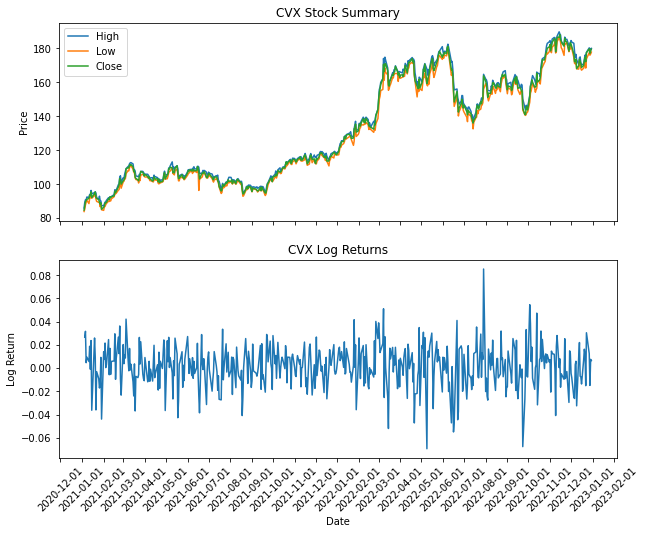

<Figure size 432x288 with 0 Axes>

In [18]:


# Convert the 'Date' column to a datetime object
CVX_df['Date'] = pd.to_datetime(CVX_df['Date'])

# Create new columns for the year and month
CVX_df['Year'] = CVX_df['Date'].dt.year
CVX_df['Month'] = CVX_df['Date'].dt.month

# Group the data by year and month, and get the first date for each group
first_of_month = CVX_df.groupby(['Year', 'Month']).first()['Date']

# Calculate log returns
CVX_df['LogReturn'] = np.log(CVX_df['Close']).diff()

# Plot the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# First subplot: stock prices
ax1.plot(CVX_df['Date'], CVX_df['High'], label='High')  
ax1.plot(CVX_df['Date'], CVX_df['Low'], label='Low')  
ax1.plot(CVX_df['Date'], CVX_df['Close'], label='Close')  
ax1.set_ylabel('Price')  
ax1.set_title('CVX Stock Summary')  
ax1.legend()  

# Second subplot: log returns
ax2.plot(CVX_df['Date'], CVX_df['LogReturn'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Log Return')
ax2.set_title('CVX Log Returns')

# Set the x-axis ticks to be the first day of each month
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.savefig('../figures/fig2.pdf')
plt.show()

In [10]:
# Doing Analysis with our Fetures of Interest
keeplist = ['Close', "LogReturn"]
summedstockdf = CVX_df[keeplist]
print(summedstockdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      503 non-null    float64
 1   LogReturn  502 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB
None


In [11]:
#creating some summary statistics 
summedstockdf.describe()

,Close,LogReturn
count,503.000000,502.000000
mean,131.520815,0.001496
std,30.228298,0.018412
min,84.709999,-0.069374
25%,103.989998,-0.008429
50%,118.790001,0.002891
75%,160.619995,0.013058
max,188.050003,0.085292


In [17]:
max_idx_H = CVX_df['Close'].idxmax()
min_idx_H = CVX_df['Close'].idxmin()
print("Best and Worst Date for Chevron Stock(Closing):")
print("Highest",CVX_df.iloc[max_idx_H]['Date'], CVX_df['Close'][max_idx_H])
print("Lowest", CVX_df.iloc[min_idx_H]['Date'], CVX_df['Close'][min_idx_H])

###Onaji ty-

Best and Worst Date for Chevron Stock(Closing):
Highest 2022-11-15 00:00:00 188.0500030517578
Lowest 2021-01-04 00:00:00 84.70999908447266


In [40]:
mergeddf = pd.read_csv("../data/merged.csv")
mergeddf.head()

,Date,Tweet ID,Text,Username,sentiment,label,score,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,1377765449077829646,@ltgrusselhonore @Baton @bp @exxonmobil @Chevr...,Fess1970,"[{'label': 'NEGATIVE', 'score': 0.961742639541...",NEGATIVE,0.961743,105.260002,105.860001,104.209999,105.75,99.121391,8515800
1,2021-04-01,1377762433461231617,if we lived in a just and honorable world ever...,buhbuhballin,"[{'label': 'NEGATIVE', 'score': 0.945913970470...",NEGATIVE,0.945914,105.260002,105.860001,104.209999,105.75,99.121391,8515800
2,2021-04-01,1377752643876098053,Committing to zero routine flaring by 2025 wil...,EDFEnergyEX,"[{'label': 'NEGATIVE', 'score': 0.999148964881...",NEGATIVE,0.999149,105.260002,105.860001,104.209999,105.75,99.121391,8515800
3,2021-04-01,1377745681134198789,Does Chevron spend 98% of its worth on dirty o...,jenkrill,"[{'label': 'NEGATIVE', 'score': 0.995059728622...",NEGATIVE,0.995060,105.260002,105.860001,104.209999,105.75,99.121391,8515800
4,2021-04-01,1377742656160284677,@SDonziger @DavidYankovich Is Chevron the Russ...,Jackie1Connolly,"[{'label': 'NEGATIVE', 'score': 0.996746778488...",NEGATIVE,0.996747,105.260002,105.860001,104.209999,105.75,99.121391,8515800


In [39]:
mergeddf['score'].describe()

count    1160.000000
mean        0.960652
std         0.086946
min         0.500485
25%         0.974087
50%         0.992183
75%         0.997086
max         0.999799
Name: score, dtype: float64

In [47]:
keeplist = ['High','score']
corrdf = mergeddf[keeplist]
cornum = corrdf.corr(method='kendall')
print(cornum)

           High     score
High   1.000000 -0.009447
score -0.009447  1.000000


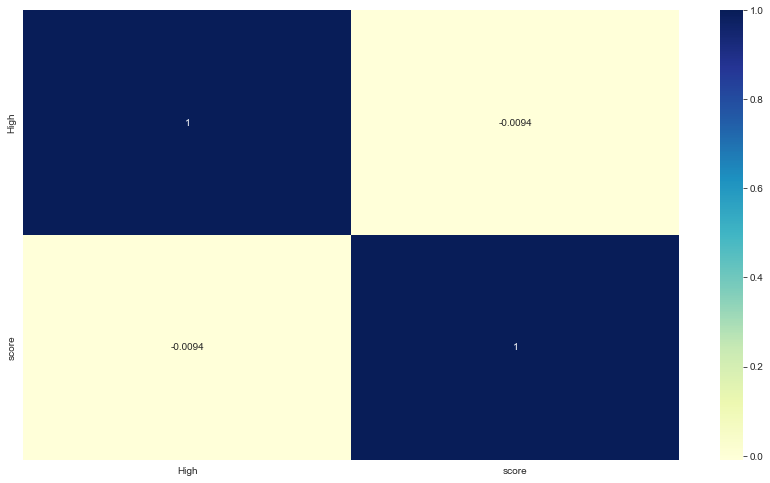

In [60]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
rcParams['figure.figsize'] = 14.7,8.27

svn = sb.heatmap(cornum, 
           xticklabels=cornum.columns.values, 
           yticklabels=cornum.columns.values, 
           cmap="YlGnBu",
          annot=True)

figure = svn.get_figure()    
figure.savefig('../figures/fig2.pdf', dpi=400)